In [59]:
from PIL import Image
import torch
from albumentations.pytorch import ToTensorV2
import numpy as np
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

from maderapp.utils import extract_patches, show

In [63]:
img = torch.arange(1, 9*3+1).reshape(3,3,3)
patches = extract_patches(images=img.unsqueeze(dim=0), channel=3, kernel_height=2, kernel_width=2)
patches.shape

torch.Size([1, 3, 2, 2])

In [65]:
img = torch.arange(1, 16*3+1).reshape(3,4,4)
img = img.unsqueeze(dim=0)
patches = extract_patches(images=img, channel=3, kernel_height=2, kernel_width=2)
patches.shape

torch.Size([4, 3, 2, 2])

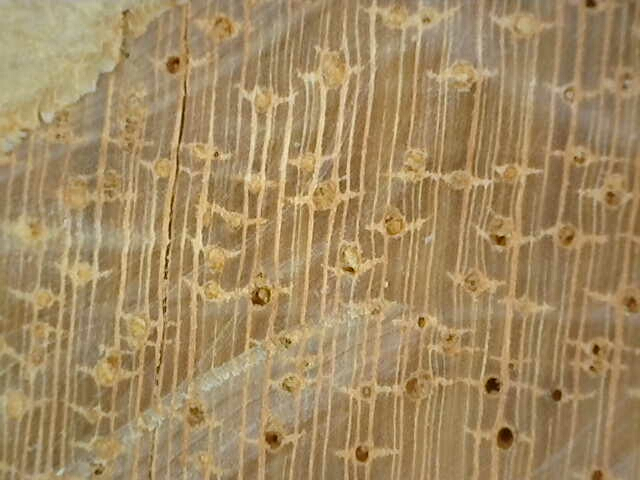

In [84]:
img = Image.open("../images/img.jpg").convert("RGB")
img

In [85]:
img_torch = ToTensorV2()(image=np.asarray(img))
print(img_torch["image"].shape)

torch.Size([3, 480, 640])


In [86]:
from albumentations.core.composition import Compose as Acompose
import albumentations as A
tranformation = A.Compose(
    [
        A.Resize(224, 224),
        ToTensorV2()
    ]
)

img_t = tranformation(image=np.asarray(img))["image"]
patches = extract_patches(images=img_t.unsqueeze(dim=0), channel=3, kernel_height=64, kernel_width=64)


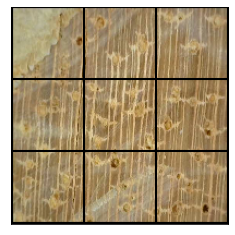

In [87]:
grid = make_grid(patches, 3)
show(grid)

In [104]:
img_np = np.asarray(img)
img_t = tranformation(image=img_np)["image"]
img_t.shape

torch.Size([3, 224, 224])

In [105]:
images = torch.concat([img_t.unsqueeze(dim=0), img_t.unsqueeze(dim=0)])
patches = extract_patches(images=images, channel=3, kernel_height=64, kernel_width=64)
patches.shape

torch.Size([18, 3, 64, 64])

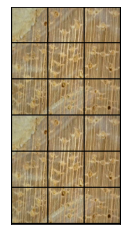

In [106]:
grid = make_grid(patches, 3)
show(grid)

In [81]:
x = torch.arange(4)
x.repeat_interleave(224//64)

tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])